# Question 1


$f(x) = 2x$ if $2x < 3 -x$

As a result,  $f(x) = 2x$ when $x<1$

Similarly, $f(x) = 3-x$ when $x \geq 1$

As a result, get that

$f(x) = ReLU([1-x]) +RelU([2x-2]) + 2$

If $x<1$ then the $ReLU()$ function maps $f(x)$ to $f(x) = 2x$ since $1-x <0$. Similarly, if $x\geq1$ then $ReLU()$ function maps $f(x)$ to $3-x$

# Question 2

We can use an artificual neural network. Each node in the nueral network computes a ReLU funciton. Each node has takes the nodes in the previous layer as inputs using a linear map. We can estimate these paramters using stochastic gradient descent.

# Question 3

* To compute the formula, first we find the Legendre polynomial $P_n(x)$. In this case,

$$P_2(x) = 1/2 (3x^2 -1) $$

* Next, we find the roots of $P_n(x)$ in (−1,1); these will be our nodes $x1,...,xn$. In this case the roots are

$x_1 = 1/\sqrt{3}$ and $x_2 = 1/\sqrt{3}$

* Third, we find the Lagrange polynomial that interpolates the integrand $f(x)$ at $x_1,...,x_n$. In this case, we get that

In this case that polynomial is

$$f(x_1)(x-x_2)/(x_1-x_2) + f(x_2)(x-x_1)/(x_2-x_1) $$



* Finally, we integrate the Lagrange polynomial to determine the weights $w1,...$ and we get

$$ \int_{-1}^{1} f(x_1)(x-x_2)/(x_1-x_2) + f(x_2)(x-x_1)/(x_2-x_1) = $$

$$f(x_1)(x^2/2 - x_2x)/(x_1-x_2) + f(x_2)(x^2/2-x_1x)/(x_2-x_1) |_{-1}^{1} = $$

$$f(x_1)(1/2 - x_2)/(x_1-x_2) + f(x_2)(1/2 -x_1)/(x_2-x_1) - [f(x_1)(1/2 + x_2)/(x_1-x_2) + f(x_2)(1/2 +x_1x)/(x_2-x_1)] = $$


$$f( 1/\sqrt{3} )+ f( 1/\sqrt{3})$$

# Question 4

The formula for a Chebychev polynomial is given by


$$T_n(x) = \cos\big(k \arccos x \big)$$

Where $|x| \leq 1 $$. Since $cos(x)$ bounded between 1 and -1, we can see from the formula that $T_n(x)$ must be bounded between -1 and 1 on the interval $[-1,1]$ 

We can see that it achieves these bounds by solving for the minimum and maximum.

Taking the derivative we get 

$$\dfrac{\partial T_n(x)}{\partial x} = -sin(k arcos(x)) \dfrac{-k}{\sqrt{1-x^2}} $$

So the extremum occur when $-sin(k arcos(x)) =0$. This occurs when $x= cos(n\pi/k)$. We can see this evaluates to 1 and -1 depending on whether $n$ is odd or even.

# Question 5

The Haar wavelet's mother wavelet function is given by

$$\psi_1(t) = \begin{cases}
  1 & 0 \leq  t < \frac{1}{2},\\
 -1 & \frac{1}{2} \leq t < 1,\\
  0 &\text{otherwise.} \end{cases}$$
  
We wavelets with support larger than or equal to 1/4 together with one shape function with
support of length 2. In this case, our shape function has support of 2

Here $\text{1}$ is the indicator function. We compute the basis below. We can solve for the coefficients using the following formula

$$F_w(a,b)= {|a|^{1/2}} \int_{-\infty}^{\infty} f(t)\overline\psi\left( {at} - b\right)\, dt$$

$$F_w(a,b) = {|a|^{1/2}} \left( \int_{-1}^{0} (1+t) \psi(at-b)dt  +  \int_{0}^{1} (1-t) \psi(ax-b)dt \right) $$

$$F_w(a,b) = {|a|^{1/2}} \left(\int_{-1}^{0} (1+t) \psi(at-b)dx  +  \int_{0}^{1} (1-t) \psi(ax-b)dt \right) $$

For, $\psi_1(t)$ We can see that $F_w(1,0) = 0$ from the formula above

If, $\psi_2(t) = \sqrt(2) \psi_1(2t-1)$  then 

$$F_w(2,-1) = {|2|^{1/2}} \left( \int_{-1}^{0} (1+t) \psi(2t-1)dt  \right) =  {|2|^{1/2}} \left( \int_{-1}^{-1/2} (1+t) \psi(2t-1)dt + \int_{-1/2}^{0} -(1+t) dt \right) = -.25 $$

Similarly,, $\psi_3(t) = \sqrt(2) \psi_1(2t+1)$ then $F_w(2,1) = .25$


$\psi_5(t) =  2 \psi_1(4t+1)$ then $F_w(4,1) = -.0625$ 

$\psi_6(t) =  2 \psi_1(4t+2)$ then $F(4,2) = -.0625$

$\psi_7(t) =  2 \psi_1(4t-1)$ then $F(4,-1) = .0625$

$\psi_8(t) =  2 \psi_1(4t-2)$ then $F(4,-2) = .0625$




In [1]:
using Pkg
using FFTW
using PyPlot

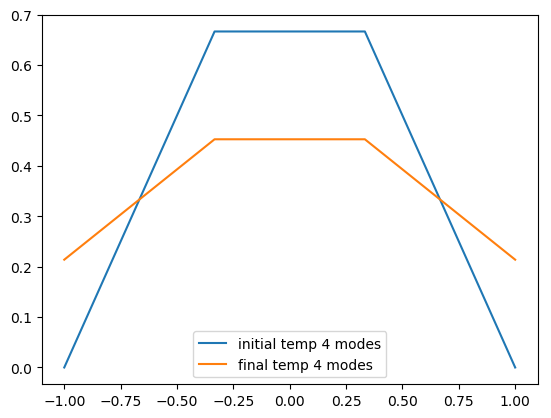

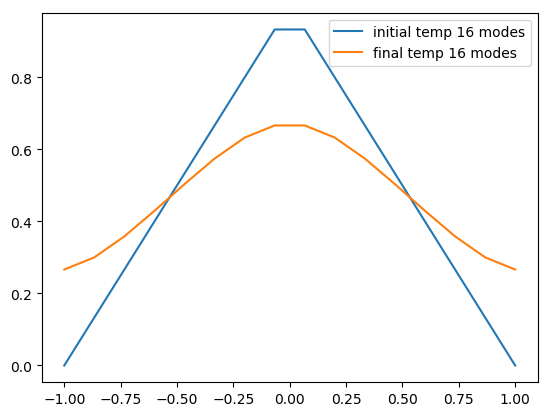

In [121]:
for N =[4,16]
    T = 1
    #setup u0
    u0=zeros(N,1)
    xs = zeros(N,1)
    for i=1:N
        xs[i] = -1+2*(i-1)/(N-1)
        u0[i]= 1 - abs( xs[i] )
    end
    figure(N)
    plot(xs,u0,label="initial temp $(N) modes")
    
    A=u0*ones(1,N);
    A=fft(A)
    
    
    t = zeros(N,1)
    for i=1:N
        t[i] = (i-1)*T/(N-1)
    end
    
    k= collect(0:N-1)
    k2= k.*k
    
    W= k2.*t
    W= exp.(-W)
    A= A.*W
    u = real(ifft(A))
    #plot(t,u[:,1])
    #plot(t,u[:,2])
    #plot(t,u[:,3])

    plot(xs,u[:,N] ,label="final temp $(N) modes")
    legend()
end

